# Online Store Sales Prediction 
## Regresi project
### Data Preparation
#### 1. Import Library

In [ ]:
#===== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#===== Skelarn =====#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#===== Evaluation =====#
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)

from sklearn.metrics import confusion_matrix

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#=====Feature Selection =====#
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

#### 2. Import data & Backup data


In [ ]:
df = pd.read_csv('online_store_customer_data.csv')

In [ ]:
df1 = pd.read_csv('online_store_customer_data.csv')

#### 3. Function Definition
##### 3.1 Check info data

In [ ]:
print('Online store customer data df shape:', df.shape)
df.head()

Online store customer data df shape: (2512, 11)


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [ ]:
df.tail()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77
2511,5/1/2021,153699,Male,48.0,Single,California,Silver,workers,PayPal,1.0,1073.15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [ ]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


##### 3.2 Check duplicated data dan drop data

In [ ]:
print(f'Duplicates in df: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')

Duplicates in df: 12, (0.5%)


In [ ]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 2512
Dataframe dimension after duplication drop 2500


##### 3.3 Handling missing value

In [ ]:
# Checking Missing Value based on distinct unique data
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()

===== Transaction_date =====
['1/1/2019' '1/3/2019' '1/4/2019' '1/5/2019' '1/6/2019' '1/7/2019'
 '1/8/2019' '1/9/2019' '1/10/2019' '1/11/2019' '1/12/2019' '1/13/2019'
 '1/14/2019' '1/16/2019' '1/17/2019' '1/18/2019' '1/19/2019' '1/20/2019'
 '1/21/2019' '1/22/2019' '1/23/2019' '1/24/2019' '1/25/2019' '1/26/2019'
 '1/27/2019' '1/29/2019' '1/30/2019' '1/31/2019' '2/1/2019' '2/2/2019'
 '2/3/2019' '2/4/2019' '2/5/2019' '2/6/2019' '2/7/2019' '2/8/2019'
 '2/10/2019' '2/11/2019' '2/12/2019' '2/13/2019' '2/14/2019' '2/15/2019'
 '2/16/2019' '2/17/2019' '2/18/2019' '2/19/2019' '2/20/2019' '2/21/2019'
 '2/22/2019' '2/23/2019' '2/24/2019' '2/25/2019' '2/26/2019' '2/27/2019'
 '2/28/2019' '3/1/2019' '3/2/2019' '3/3/2019' '3/4/2019' '3/5/2019'
 '3/6/2019' '3/7/2019' '3/8/2019' '3/9/2019' '3/10/2019' '3/11/2019'
 '3/12/2019' '3/13/2019' '3/14/2019' '3/15/2019' '3/16/2019' '3/17/2019'
 '3/18/2019' '3/19/2019' '3/20/2019' '3/21/2019' '3/22/2019' '3/23/2019'
 '3/24/2019' '3/25/2019' '3/26/2019' '3/27/2019

In [ ]:
df.isna().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             154
Amount_spent        241
dtype: int64

In [ ]:
#Handling Missing Value
df.dropna(subset=['Amount_spent'], inplace=True)
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['Employees_status'], inplace=True)
df.dropna(subset=['Referal'], inplace=True)

In [ ]:
#check ulang isna
df.isna().sum()

Transaction_date    0
Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64

In [ ]:
df['Segment'].value_counts()

Basic       929
Silver      392
Platinum    350
Gold        198
Missing     165
Name: Segment, dtype: int64

In [ ]:
# Mode imputation on Segment column

mode_segment = df[~df['Segment'].isin(['Missing'])]['Segment'].mode()[0]
#proses imputasi nilai
df['Segment'] = df['Segment'].apply(lambda x: mode_segment if x in ['Missing'] else x)

In [ ]:
# Checking Handling Missing Value based on distinct unique data
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()

===== Transaction_date =====
['1/1/2019' '1/3/2019' '1/4/2019' '1/5/2019' '1/6/2019' '1/7/2019'
 '1/8/2019' '1/9/2019' '1/10/2019' '1/11/2019' '1/12/2019' '1/13/2019'
 '1/14/2019' '1/16/2019' '1/17/2019' '1/18/2019' '1/19/2019' '1/20/2019'
 '1/21/2019' '1/22/2019' '1/23/2019' '1/24/2019' '1/25/2019' '1/26/2019'
 '1/27/2019' '1/29/2019' '1/30/2019' '1/31/2019' '2/1/2019' '2/2/2019'
 '2/3/2019' '2/4/2019' '2/5/2019' '2/6/2019' '2/7/2019' '2/8/2019'
 '2/10/2019' '2/11/2019' '2/12/2019' '2/13/2019' '2/14/2019' '2/15/2019'
 '2/16/2019' '2/17/2019' '2/18/2019' '2/19/2019' '2/20/2019' '2/21/2019'
 '2/22/2019' '2/23/2019' '2/24/2019' '2/25/2019' '2/26/2019' '2/27/2019'
 '2/28/2019' '3/1/2019' '3/2/2019' '3/3/2019' '3/4/2019' '3/5/2019'
 '3/6/2019' '3/7/2019' '3/8/2019' '3/9/2019' '3/10/2019' '3/12/2019'
 '3/13/2019' '3/14/2019' '3/15/2019' '3/16/2019' '3/17/2019' '3/18/2019'
 '3/19/2019' '3/20/2019' '3/21/2019' '3/22/2019' '3/23/2019' '3/24/2019'
 '3/25/2019' '3/26/2019' '3/27/2019' '3/28/2019

In [ ]:
numeric = list(df.select_dtypes(include=np.number))
numeric

['Transaction_ID', 'Age', 'Referal', 'Amount_spent']

#### 4. Exploratory Data Analysis (EDA)

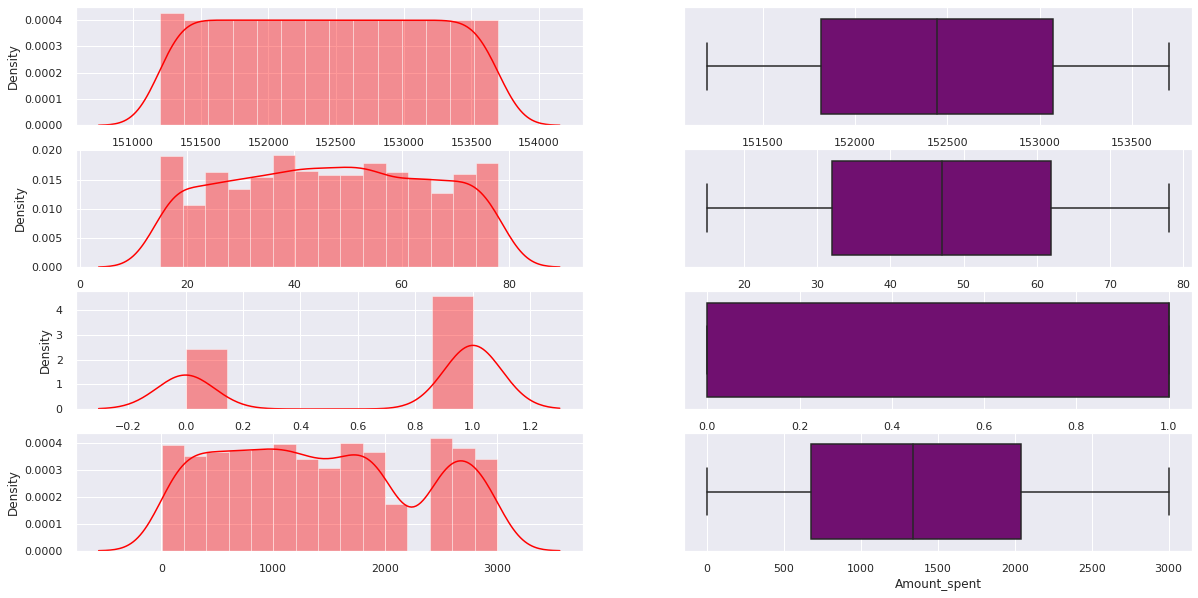

In [ ]:
features = numeric
fig, ax = plt.subplots(len(features),2,figsize=(20,10))
for idx, column in enumerate(features):
    sns.distplot(
        x=df1[column], 
        color='red', 
        ax=ax[idx][0])
    sns.boxplot(
        x=df1[column],
        color='purple',
        ax=ax[idx][1]
        )

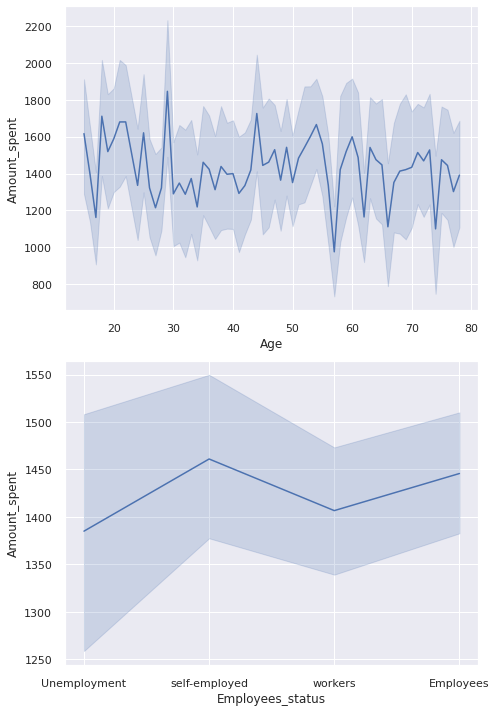

In [ ]:
X_feature = ['Age',
 'Employees_status']
X_index = list(range(len(X_feature)))
fig, ax = plt.subplots(2,1,figsize=(7,10))
for i in X_index:
    sns.lineplot(data=df, x = X_feature[i], y = 'Amount_spent', ax=ax[i])
    plt.tight_layout()

In [ ]:
def categorical_data(title):
    plt.figure(figsize=(17,8))
    g=sns.catplot(x=title,kind='count', palette='viridis', data=df)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + 0.02, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

<Figure size 1224x576 with 0 Axes>

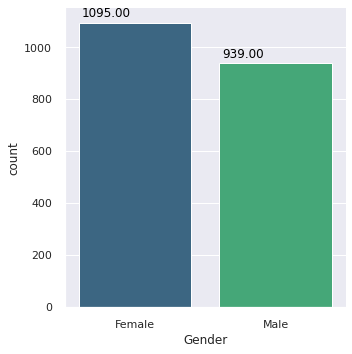

In [ ]:
categorical_data('Gender')

<Figure size 1224x576 with 0 Axes>

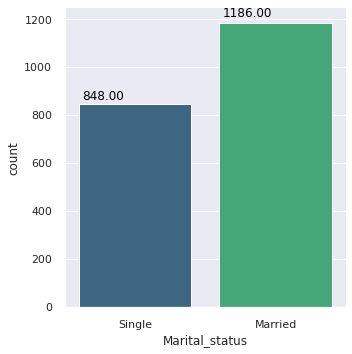

In [ ]:
categorical_data('Marital_status')

<Figure size 1224x576 with 0 Axes>

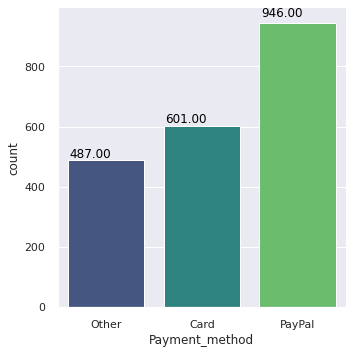

In [ ]:
categorical_data('Payment_method')

<Figure size 1224x576 with 0 Axes>

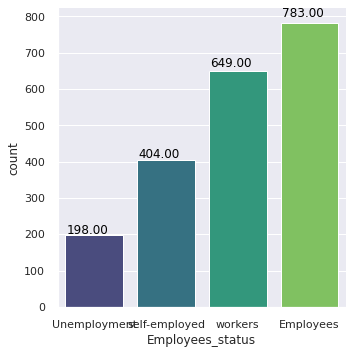

In [ ]:
categorical_data('Employees_status')

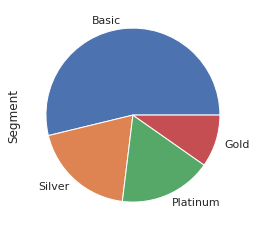

In [ ]:
df['Segment'].value_counts().plot(
    kind='pie');

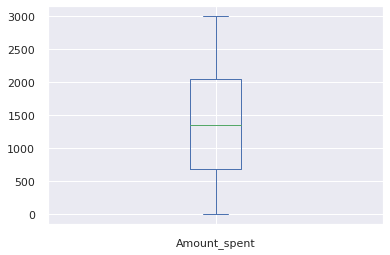

In [ ]:
df.plot(y=['Amount_spent'], kind='box');

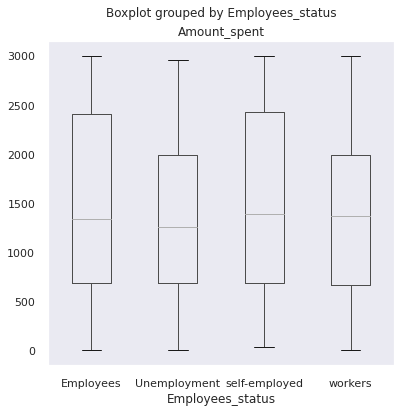

In [ ]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
fig, ax = plt.subplots(figsize=(6,6)) 

df.boxplot(by ='Employees_status', column =['Amount_spent'],ax=ax, grid = False);

#### 5. Feature Selection
##### 5.1 Calculate VIF score for each feature

In [ ]:
# define feature and target
feature_x = df[numeric]
target_Y = df[['Amount_spent']]

In [ ]:
feature_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  2034 non-null   int64  
 1   Age             2034 non-null   float64
 2   Referal         2034 non-null   float64
 3   Amount_spent    2034 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 144.0 KB


In [ ]:
# Calculate VIF score for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_x)

vif_df = pd.DataFrame([vif(X.values, i)
            for i in range(X.shape[1])],
            index = X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Transaction_ID,1.000592
2,Age,1.000485
3,Referal,1.000111
4,Amount_spent,1.000651


##### Vif sudah bagus jika lewat dari 4 harus di korelasi

<function matplotlib.pyplot.show(*args, **kw)>

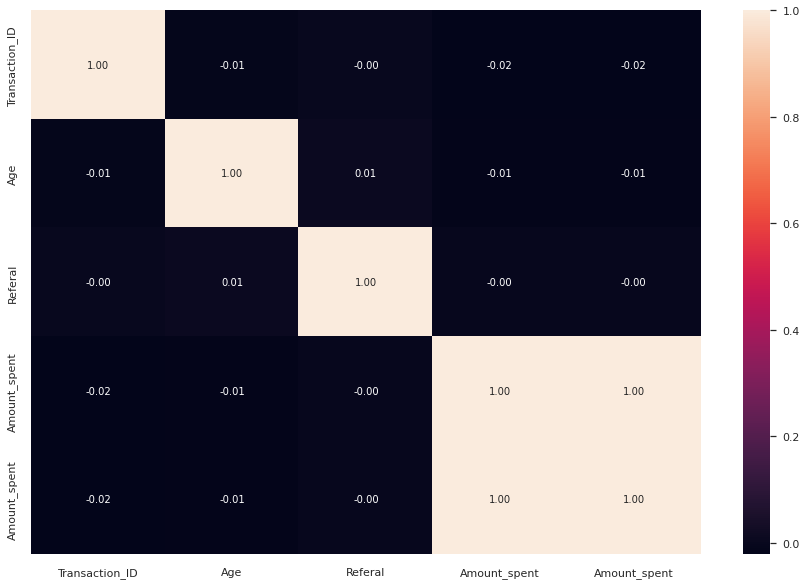

In [ ]:
# heatmap correlation

data = pd.concat([feature_x, target_Y], axis=1)
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show


##### sudah bagus juga heatmapnya
1. Hubungan antar variabel x dengan harus cari yang < 0,7 ( 0 , 0,6 atau bahkan bisa minus)
2. Korelasi jangan dimutlakin
3. jika hubungan korelasi antar variable x > 0,7 maka pilih salah satu dengan cara :
    a. Hubungan masing-masing variable x tersebut dengan sumbu y cari yang paling besar 

#### 6. Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
# ini untuk menghindari Data Leakage

# define feature and target
#feature = df[numeric] # untuk numerical variable kolom saja

feature = df.drop(columns = 'Amount_spent') #untuk including categorical
target = df[['Amount_spent']]

# split pre-train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
#ini untuk cross validasi dan training data
feature_medv_pretrain = X_train 

In [ ]:
 #ini untuk evaluasi model
 feature_medv_test = X_test

In [ ]:
target_medv_pretrain = y_train

In [ ]:
target_medv_test = y_test

#### 7. Encoding Categorical

In [ ]:
#Function Frequent Encoding
def freq_encoding(df_train, df_test, col_to_count):
    
    # make a temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in col_to_count:
        # make the dictionary mapping label to counts
        X_frequency_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col] = df_train_temp[col].map(X_frequency_map)
        df_test_temp[col] = df_test_temp[col].map(X_frequency_map)
    
    return df_train_temp, df_test_temp

In [ ]:
#label encoding
def ordinal_encoding(df_train, df_test):
    df_train = df_train.copy()
    df_test = df_test.copy()
    
  #encoding requirement menyesuaikan kolom -> yang ordinal dengan makna positif dan negatifnya itu jelas
    mapping_dictionary = {"Segment" :{"Basic" : 1 , "Silver" : 2, "Gold" : 3, "Platinum" : 4},
                         }
    
    df_train.replace(mapping_dictionary , inplace=True)
    df_test.replace(mapping_dictionary , inplace=True)
    
    return df_train, df_test

In [ ]:
feature_medv_pretrain.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
1998,11/7/2020,153198,Female,67.0,Single,California,Basic,workers,Card,1.0
2090,12/10/2020,153290,Male,33.0,Married,California,Basic,Employees,Other,0.0
2169,1/9/2021,153369,Female,60.0,Married,Nevada,Platinum,Employees,PayPal,1.0
944,11/11/2019,152144,Male,42.0,Single,Tennessee,Platinum,Employees,Card,1.0
1666,7/22/2020,152866,Female,48.0,Married,Alaska,Basic,Employees,PayPal,0.0


In [ ]:
feature_medv_test.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
782,9/19/2019,151982,Female,61.0,Married,Missouri,Basic,workers,PayPal,1.0
132,2/20/2019,151332,Female,49.0,Married,Nebraska,Basic,Employees,PayPal,1.0
1474,5/13/2020,152674,Male,37.0,Married,Connecticut,Silver,self-employed,PayPal,1.0
1879,9/26/2020,153079,Male,48.0,Married,Rhode Island,Basic,Unemployment,PayPal,0.0
973,11/21/2019,152173,Male,42.0,Single,Iowa,Platinum,Employees,PayPal,1.0


In [ ]:
col_to_use = ['Payment_method','Employees_status','State_names','Gender','Marital_status']
feature_medv_pretrain,feature_medv_test = freq_encoding(feature_medv_pretrain,feature_medv_test,col_to_use)

In [ ]:
feature_medv_pretrain,feature_medv_test = ordinal_encoding(feature_medv_pretrain,feature_medv_test)

#### 8. Standardize Variable (Feature Scalling -> Transform)

In [ ]:
feature_medv_test.describe()

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,152481.547912,818.024570,48.147420,840.326781,32.334152,1.931204,488.670762,591.412776,0.651106
std,728.249147,63.416555,18.010612,122.750132,6.032456,1.159745,152.459248,155.739667,0.477207
min,151226.000000,750.000000,15.000000,688.000000,22.000000,1.000000,155.000000,399.000000,0.000000
25%,151822.000000,750.000000,33.000000,688.000000,28.000000,1.000000,332.000000,477.000000,0.000000
50%,152517.000000,877.000000,48.000000,939.000000,31.000000,1.000000,523.000000,477.000000,1.000000
75%,153105.500000,877.000000,65.000000,939.000000,36.000000,3.000000,617.000000,751.000000,1.000000
max,153691.000000,877.000000,78.000000,939.000000,47.000000,4.000000,617.000000,751.000000,1.000000


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(feature_medv_pretrain.select_dtypes(include=numerics).columns)
feature_medv_pretrain = feature_medv_pretrain[numerical_vars]
feature_medv_pretrain

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
1998,153198,877,67.0,688,35,1,523,477,1.0
2090,153290,750,33.0,939,35,1,617,399,0.0
2169,153369,877,60.0,939,31,4,617,751,1.0
944,152144,750,42.0,688,23,4,617,477,1.0
1666,152866,877,48.0,939,28,1,617,751,0.0
...,...,...,...,...,...,...,...,...,...
1410,152610,750,37.0,688,47,4,332,477,1.0
1608,152808,877,35.0,939,45,1,617,751,0.0
1084,152284,877,62.0,939,31,1,523,399,1.0
1814,153014,877,59.0,688,33,2,332,399,0.0


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(feature_medv_test.select_dtypes(include=numerics).columns)
feature_medv_test = feature_medv_test[numerical_vars]
feature_medv_test

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
782,151982,877,61.0,939,34,1,523,751,1.0
132,151332,877,49.0,939,28,1,617,751,1.0
1474,152674,750,37.0,939,28,2,332,751,1.0
1879,153079,750,48.0,939,31,1,155,751,0.0
973,152173,750,42.0,688,26,4,617,751,1.0
...,...,...,...,...,...,...,...,...,...
628,151828,750,69.0,939,28,1,617,399,1.0
2397,153597,750,62.0,939,29,1,617,751,1.0
1759,152959,877,26.0,688,26,4,617,399,1.0
2095,153295,750,18.0,939,26,2,332,399,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
# ini untuk menghindari Data Leakage dan supaya normal distributed
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(feature_medv_pretrain) #feature_medv_pretrain ini dari train (menyesuaikan)
scaled_Xtest = scaler.transform(feature_medv_test) #ini dari test (menyesuaikan) feature_medv_test

In [ ]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index()

#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index()

In [ ]:
feature_medv_pretrain = scaled_Xtrain
feature_medv_pretrain = feature_medv_pretrain.drop(['index'],axis=1)  
feature_medv_pretrain 

,0,1,2,3,4,5,6,7,8
0,1.020243,0.924764,1.118236,-1.168257,0.216393,-0.784356,0.257496,-0.684096,0.722484
1,1.147644,-1.081357,-0.744076,0.855976,0.216393,-0.784356,0.888056,-1.181174,-1.384114
2,1.257042,0.924764,0.734818,0.855976,-0.427836,1.839662,0.888056,1.062054,0.722484
3,-0.439319,-1.081357,-0.251111,-1.168257,-1.716295,1.839662,0.888056,-0.684096,0.722484
4,0.560495,0.924764,0.077532,0.855976,-0.911009,-0.784356,0.888056,1.062054,-1.384114
...,...,...,...,...,...,...,...,...,...
1622,0.205991,-1.081357,-0.524981,-1.168257,2.149081,1.839662,-1.023747,-0.684096,0.722484
1623,0.480178,0.924764,-0.634529,0.855976,1.826967,-0.784356,0.888056,1.062054,-1.384114
1624,-0.245449,0.924764,0.844366,0.855976,-0.427836,-0.784356,0.257496,-1.181174,0.722484
1625,0.765443,0.924764,0.680045,-1.168257,-0.105722,0.090317,-1.023747,-1.181174,-1.384114


In [ ]:
feature_medv_test = scaled_Xtest
feature_medv_test = feature_medv_test.drop(['index'],axis=1) 
feature_medv_test

,0,1,2,3,4,5,6,7,8
0,-0.663654,0.924764,0.789592,0.855976,0.055336,-0.784356,0.257496,1.062054,0.722484
1,-1.563763,0.924764,0.132306,0.855976,-0.911009,-0.784356,0.888056,1.062054,0.722484
2,0.294617,-1.081357,-0.524981,0.855976,-0.911009,0.090317,-1.023747,1.062054,0.722484
3,0.855454,-1.081357,0.077532,0.855976,-0.427836,-0.784356,-2.211078,1.062054,-1.384114
4,-0.399160,-1.081357,-0.251111,-1.168257,-1.233123,1.839662,0.888056,1.062054,0.722484
...,...,...,...,...,...,...,...,...,...
402,-0.876910,-1.081357,1.227783,0.855976,-0.911009,-0.784356,0.888056,-1.181174,0.722484
403,1.572772,-1.081357,0.844366,0.855976,-0.749951,-0.784356,0.888056,1.062054,0.722484
404,0.689280,0.924764,-1.127494,-1.168257,-1.233123,1.839662,0.888056,-1.181174,0.722484
405,1.154568,-1.081357,-1.565685,0.855976,-1.233123,0.090317,-1.023747,-1.181174,0.722484


#### 9. Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

##### 9.1 Split Data Train For Training and Cross Validation

In [ ]:
# split pre-train into train and validation (80:20)
feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.2, random_state=42)

##### 9.2 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)


Ridge(alpha=10, random_state=42)

##### 9.3 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model : ini siswa lagi belajar
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)


Lasso(alpha=10, random_state=42)

#### 10. Choose the best lambda from the validation set

##### 10.1 Use RMSE as metric

###### a. Ridge Regression

In [ ]:
from sklearn.metrics import mean_squared_error
# siswanya lagi kuis
X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
ridge_models = [ridge_reg_pointzeroone,
                ridge_reg_pointone,
                ridge_reg_one,
                ridge_reg_ten]

for model, alpha in zip(ridge_models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 884.3992178169317
RMSE of Ridge regression model with alpha = 0.1 is 884.3989043184703
RMSE of Ridge regression model with alpha = 1.0 is 884.3957721256287
RMSE of Ridge regression model with alpha = 10 is 884.3647269739731


Best alpha for Ridge Regression (the smallest RSME) is ridge_reg_ten (alpha=10)

###### b. Lasso Regression

In [ ]:
lasso_models = [lasso_reg_pointzeroone,
                lasso_reg_pointone,
                lasso_reg_one,
                lasso_reg_ten]

for model, alpha in zip(lasso_models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 884.3964683790605
RMSE of Lasso regression model with alpha = 0.1 is 884.3714589595006
RMSE of Lasso regression model with alpha = 1.0 is 884.1260723328525
RMSE of Lasso regression model with alpha = 10 is 882.2379969411667


Best alpha for LASSO (the smallest RSME) is lasso_reg_one (alpha=1)

##### 10.2 Interpret a sample of the coefficients of the best model

###### a. Ridge *Regression*

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1435.671678
1,0,25.983440
2,1,10.051697
3,2,2.737559
4,3,4.028355
5,4,-17.456382
6,5,-2.077055
7,6,8.584679
8,7,-9.447666
9,8,-24.497467


###### b. Lasso Regression

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1435.677526
1,0,25.241789
2,1,9.137643
3,2,1.863972
4,3,3.105271
5,4,-16.680699
6,5,-1.086412
7,6,7.797573
8,7,-8.588819
9,8,-23.742835


#### 11. Evaluate the Best Models on the Test Data (+ Interpretation)

##### 11.1 Ridge Regression

In [ ]:
from sklearn.metrics import r2_score

y_predict_train_r2ridge = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train_r2ridge)))

R-squared for training data is 0.002606562582199823


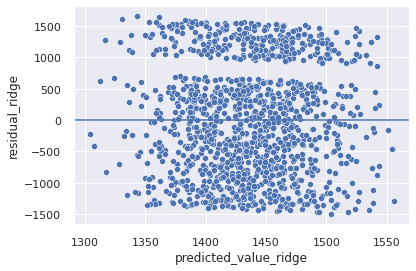

In [ ]:
# calculate residuals
residual_r2ridge = y_medv_train - y_predict_train_r2ridge

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid_ridge = pd.DataFrame({
    'predicted_value_ridge': y_predict_train_r2ridge,
    'residual_ridge': residual_r2ridge
})

# residual plot
sns.scatterplot(data=df_resid_ridge, x="predicted_value_ridge", y="residual_ridge")
plt.axhline(0)
plt.show()

##### 11.2 Lasso Regression

In [ ]:
from sklearn.metrics import r2_score

y_predict_train_r2lasso = lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train_r2lasso)))

R-squared for training data is 0.002595833341985876


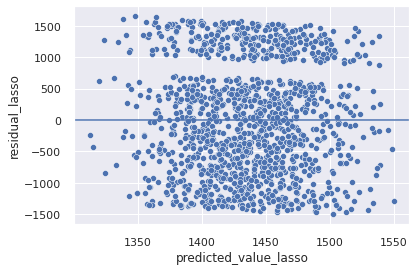

In [ ]:
# calculate residuals
residual_r2lasso = y_medv_train - y_predict_train_r2lasso

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid_lasso = pd.DataFrame({
    'predicted_value_lasso': y_predict_train_r2lasso,
    'residual_lasso': residual_r2lasso
})

# residual plot
sns.scatterplot(data=df_resid_lasso, x="predicted_value_lasso", y="residual_lasso")
plt.axhline(0)
plt.show()

#### 12. Prepare Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# RIDGE

# prepare prediction result on train data
y_predict_train_ridge = ridge_best.predict(X_medv_train)

# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test_ridge = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [1]:
linear_visualize = ResidualsPlot(ridge_best,hist=False,qqplot=True)
linear_visualize.fit(X_medv_train, y_medv_train)
linear_visualize.score(X_medv_test, y_medv_test)
linear_visualize.show();

NameError: ignored

Assumptions to check via residual plot:

Linear relationship dilihat dari Q-Q plot jika semakin linear maka pemodelannya dan proses feature selection dan engineeringnya sudah Baik
Constant variance sudah baik karena pada residual rentang sebaran datanya itu ada di range yang berdekatan yaitu pada -10 hingga 10 untuk sumbu residualnya dan predicted value nya itu ada di rentang 0 s.d 40
Independent residual OK (secara pattern tidak terlalu acak)

In [ ]:
# LASSO

# prepare prediction result on train data
y_predict_train_lasso = lasso_best.predict(X_medv_train)

# prepare prediction result on test data
#X_medv_test = feature_medv_test.to_numpy()
y_predict_test_lasso = lasso_best.predict(X_medv_test)

# ground truth target
#y_medv_test = target_medv_test.to_numpy()
#y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
linear_visualize = ResidualsPlot(lasso_best,hist=False,qqplot=True)
linear_visualize.fit(X_medv_train, y_medv_train)
linear_visualize.score(X_medv_test, y_medv_test)
linear_visualize.show();

Assumptions to check via residual plot:

- Linear relationship dilihat dari Q-Q plot jika semakin linear maka pemodelannya dan proses feature selection dan engineeringnya sudah Baik

Model yang paling bagus di Regresi :
1. MAE -> harus kecil < 20% -> MAE itu performa machine learning (Nilai MAE / Maks)
2. RMSE -> harus kecil <20% -> RMSE itu seberapa eror machine learning melakukan prediksi (Nilai RMSE / (Maks)
3. R^2 -> tentatif, linear model (harus tinggi -> mendekati 100% atau dari 0 < x < 1). Kalau bukan linear model maka R^2 kecil no problem
4. Mape -> seberapa tepat dia menghasilkan prediksi, diliat dari hasil predict nya
5. Q-Q Plot harus linear (45 derajat)
6. Coefficient : makin + (makin besar) maka indikasi kuat dia pengaruh ke target, makin minus maka dia tidak begitu berpengaruh ke target (prediksi)

In [ ]:
# MAE RIDGE

print('MAE Ridge for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train_ridge)))
print('MAE Ridge for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test_ridge)))

MAE Ridge for training data is 747.507026970826
MAE Ridge for testing data is 798.9515560079398


In [ ]:
a = 747/2999.980000 *100
print("Train MAE Ridge %",a)
b =793.9204370417691/2999.980000 *100
print("Test MAE Ridge %",b)

Train MAE Ridge % 24.900166001106676
Test MAE Ridge % 26.464190995998944


In [ ]:
# MAE LASSO

print('MAE Lasso for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train_lasso)))
print('MAE Lasso for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test_lasso)))

MAE Lasso for training data is 747.523718305331
MAE Lasso for testing data is 798.5793527415583


In [ ]:
a = 747.926750101222/2999.980000 *100
print("Train MAE Lasso%",a)
b = 793.6944611277792/2999.980000 *100
print("Test MAE Lasso %",b)

Train MAE Lasso% 24.931057877093245
Test MAE Lasso % 26.45665841531541


In [ ]:
# Mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#MAPE RIDGE

print('MAPE Ridge for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train_ridge)))
print('MAPE Ridge for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test_ridge)))

MAPE Ridge for training data is 382.0443818130803
MAPE Ridge for testing data is 435.8250241397327


In [ ]:
y_predict_train_ridge.mean()

y_predict_test_ridge.mean()

1440.5796043621972

In [ ]:
a = 382.4146122665313/2999.980000 *100
print("Train MAPE Ridge %",a)
b = 430.4300609635075/2999.980000 *100
print("Test MAPE Ridge %",b)

Train MAPE Ridge % 12.747238723809204
Test MAPE Ridge % 14.347764350545923


In [ ]:
y_predict_train_ridge

array([1378.43406494, 1463.97863218, 1420.35298854, ..., 1402.19602045,
       1445.75361762, 1445.1277491 ])

In [ ]:
#MAPE LASSO

print('MAPE Lasso for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train_lasso)))
print('MAPE Lasso for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test_lasso)))

MAPE Lasso for training data is 382.17785072197665
MAPE Lasso for testing data is 435.35766034692955


In [ ]:
a = 382.5376809248715/2999.980000 *100
print("Train MAPE Lasso %",a)
b = 430.11629919652387/2999.980000 *100
print("Test MAPE Lasso %",b)

Train MAPE Lasso % 12.751341039769315
Test MAPE Lasso % 14.337305555254499


In [ ]:
# RMSE RIDGE

print('RMSE Ridge for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train_ridge))))
print('RMSE Ridge for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test_ridge))))

RMSE Ridge for training data is 876.3402050014538
RMSE Ridge for testing data is 917.7282488377192


In [ ]:
a = 876.7299020874547/2999.980000 *100
print("Train RMSE Ridge %",a)
b = 913.0885094740622/2999.980000 *100
print("Test RMSE Ridge %",b)

Train RMSE Ridge % 29.224524899747824
Test RMSE Ridge % 30.4364865590458


In [ ]:
# RMSE LASSO

print('RMSE Lasso for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train_lasso))))
print('RMSE Lasso for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test_lasso))))

RMSE Lasso for training data is 876.3449185071426
RMSE Lasso for testing data is 917.3651305038957


In [ ]:
a = 876.7341347526803/2999.980000 *100
print("Train RMSE Lasso %",a)
b = 912.8636881643878/2999.980000 *100
print("Test RMSE Lasso %",b)

Train RMSE Lasso % 29.224665989529274
Test RMSE Lasso % 30.42899246542936
